In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

In [2]:
replace_image = ''
target_image = ''
dim=(500, 300)

In [3]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [4]:
# img = cv.imread("img/img_1.jpg")
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# img_2 = cv.imread("img/img_2.jpg")
# img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

# dim = (500, 300)
# # resize image
# img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
# img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

# show_img_compar(img, img_2)

In [5]:
def load_and_resize_images(image_path1, image_path2):
    img1 = cv.imread(image_path1)
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    
    img2 = cv.imread(image_path2)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

    img1_resized = cv.resize(img1, dim, interpolation=cv.INTER_AREA)
    img2_resized = cv.resize(img2, dim, interpolation=cv.INTER_AREA)
    
    return img1_resized, img2_resized

In [6]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette, perc

In [7]:
def resample(labels, centers):
    resamp = []
    for p in labels:
        resamp.append(centers[p])
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    plt.imshow(res/255.0)

In [8]:
def isolate_color(labels, centers, color_idx, fill_idx):
    resamp = []
    for p in labels:
        if p == color_idx:
            resamp.append(centers[p])
        else:
            resamp.append(centers[fill_idx])
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    plt.imshow(res/255.0)

In [9]:
def transfer(labels, centers):
    resamp = []
    for p in labels:
        resamp.append(centers[p])
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    plt.imshow(res/255.0)
    return res

In [10]:
def cal_percs(perc_1, perc_2, clt_1, clt_2):
    percs = list(perc_1.values())
    keys = list(perc_1.keys())
    
    percs2 = list(perc_2.values())
    keys2 = list(perc_2.keys())
    
    sort_perc = sorted(perc_1.values())
    sort_perc2 = sorted(perc_2.values())
    
    for i in range(len(sort_perc)):
        r_idx = percs.index(sort_perc[i])
        t_idx = percs2.index(sort_perc2[i])
        r_ki = keys[r_idx]
        t_ki = keys2[t_idx]  # Fixed this line
        r_color = clt_1.cluster_centers_[r_ki]
        clt_2.cluster_centers_[t_ki] = r_color

In [11]:
def save_r_image(b):
    global replace_image
    replace_image = F'{input_text_r.value}.jpg'
    input_text_r.value = ''

In [12]:
def save_t_image(b):
    global target_image
    target_image = F'{input_text_t.value}.jpg'
    input_text_t.value = ''

In [13]:
def process_images(img_1, img_2, nc=3):
    
    clt1 = KMeans(n_clusters=nc)
    clt_1 = clt1.fit(img_1.reshape(-1, 3))
    pal_1, perc_1 = palette_perc(clt_1)
    show_img_compar(img_1, pal_1)
    
    clt2 = KMeans(n_clusters=nc)
    clt_2 = clt2.fit(img_2.reshape(-1, 3))
    pal_2, perc_2 = palette_perc(clt_2)
    show_img_compar(img_2, pal_2)

    return perc_1, perc_2, clt_1, clt_2

In [14]:
img, img_2 = load_and_resize_images("img/img_1.jpg", "img/img_2.jpg")

C:\Users\tobit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 0.78, 1: 0.11, 2: 0.12}
[[ 13.48697189  17.92429285  18.81440726]
 [175.17341577 214.43882535 204.24766615]
 [110.33625443  92.7865475   65.55353723]]


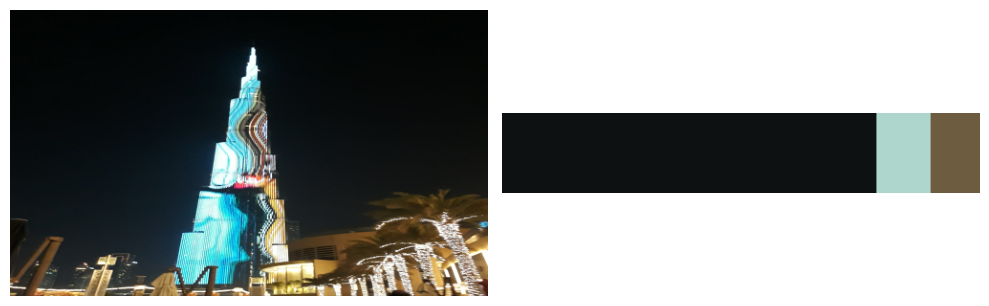

C:\Users\tobit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 0.57, 1: 0.18, 2: 0.24}
[[  8.04028131   4.92484536   3.48664833]
 [221.74745058 199.09851636 159.64381696]
 [119.86895931  90.76729028  56.63968583]]


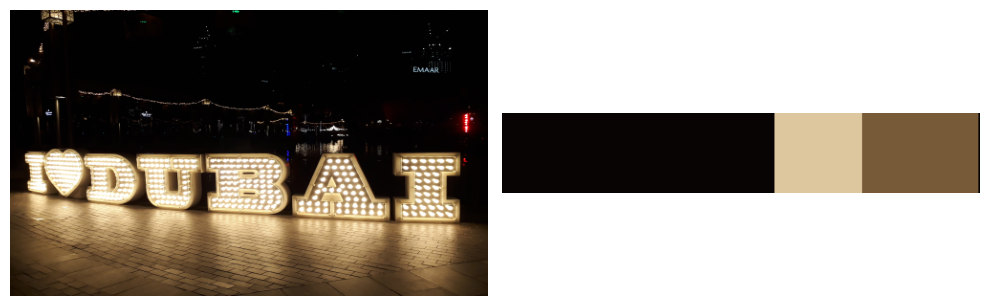

In [15]:
perc, perc2, clt_1, clt_2 = process_images(img, img_2)

In [16]:
cal_percs(perc, perc2, clt_1, clt_2)

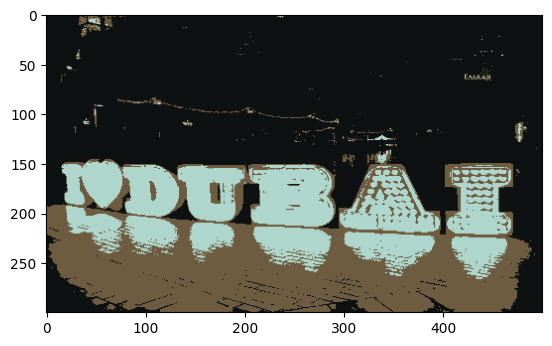

In [17]:
transfer_img = transfer(clt_2.labels_, clt_1.cluster_centers_)

In [18]:
# img = cv.cvtColor(transfer_img.astype('uint8'), cv.COLOR_RGB2BGR)
# cv.imwrite('transfer.png', img)

In [19]:
input_text_r = widgets.Text()
submit = widgets.Button(description='Submit Replacement Image')
submit.on_click(save_r_image)

display(widgets.VBox([input_text_r, submit]))

In [20]:
input_text_t = widgets.Text()
submit = widgets.Button(description='Submit Target Image')
submit.on_click(save_t_image)

display(widgets.VBox([input_text_t, submit]))

In [22]:
output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    img, img_2 = load_and_resize_images(replace_image, target_image)
    perc, perc2, clt_1, clt_2 = process_images(img, img_2, 256)
    cal_percs(perc, perc2, clt_1, clt_2)
    transfer_img = transfer(clt_2.labels_, clt_1.cluster_centers_)
    plt.imshow(transfer_img/255.0)
    plt.show()
    img = cv.cvtColor(transfer_img.astype('uint8'), cv.COLOR_RGB2BGR)
    cv.imwrite('transfer.png', img)

button = widgets.Button(description="Process Images")
button.on_click(on_button_clicked)
display(button)
display(output)

Button(description='Process Images', style=ButtonStyle())

Output()